<a href="https://colab.research.google.com/github/nish700/padai/blob/master/FeedForward_NeuralNetwork_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, mean_squared_error , log_loss
from sklearn.datasets import make_blobs
import math
import time
import torch


# Data Upload and Visualization

In [4]:
torch.manual_seed(0)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

In [0]:
data, labels = make_blobs(n_samples=1000,centers=4, n_features=2, random_state=0)

In [7]:
print(data.shape, labels.shape)

(1000, 2) (1000,)


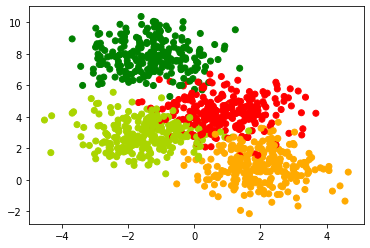

In [8]:
plt.scatter(data[:,0],data[:,1], c = labels, cmap=my_cmap)

# Splitting the data into test and train sets

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(750, 2) (250, 2) (750,) (250,)


# converting the data into tensor

In [10]:
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


# defining the model

In [0]:
# the model is simple 2 layered, first layer having 2 neurons while , the second layer having 4 neurons
def model(x):
  a1 = torch.matmul(x, weights1) + bias1 # (N,2) * (2,2) --> (N,2)
  h1 = a1.sigmoid() # (N,2)
  a2 = torch.matmul(h1, weights2) + bias2 # (N,2) * (2,4) --> (N,4)
  h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1) # softmax 
  ##tensor.unsqueeze appends 1 at the specified location
  return h2

# defining the target

In [0]:
y_hat = torch.tensor([[0.1,0.2,0.3,0.4],[0.8,0.1,0.05,0.05]])
y = torch.tensor([2,0])

#defining the loss function

In [0]:
def loss_fn(y_hat,y):
  return -(y_hat[range(y.shape[0]),y].log()).mean()

# defining the accuracy function

In [0]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred==y).float().mean()


# calculating the loss and accuracy and plotting

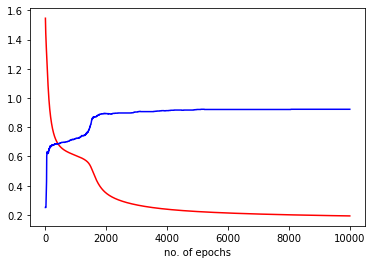

loss before training 1.5456441640853882
loss after training 0.19288592040538788


In [15]:
torch.manual_seed(0)
weights1 = torch.randn(2,2)/ math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)
weights2 = torch.randn(2,4)/ math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4,requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_fn(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat,Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr,'r-')
plt.plot(acc_arr,'b-')
plt.xlabel("no. of epochs")
plt.show()

print('loss before training',loss_arr[0])
print('loss after training', loss_arr[-1])

# Using NN.functional

##importing functional library of nn

In [0]:
import torch.nn.functional as F

## calculating the loss and accuracy using nn.functional

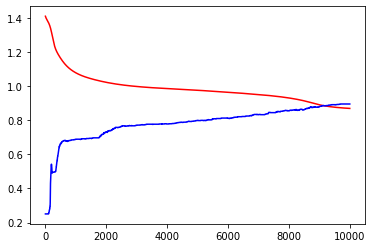

loss before training: 1.4111980199813843
loss after training: 0.8700680136680603


In [17]:
torch.manual_seed(0)
weights1 = torch.randn(2,2)/ math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad = True)
weights2 = torch.randn(2,4)/ math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad= True)

learning_rate = 0.3
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
accu_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  accu_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= weights1.grad * learning_rate
    bias1 -= bias1.grad * learning_rate
    weights2 -= weights2.grad * learning_rate
    bias2 -= bias2.grad * learning_rate

    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr,'r-')
plt.plot(accu_arr,'b-')
plt.show()

print('loss before training:', loss_arr[0])
print('loss after training:', loss_arr[-1])

# using NN.Parameter

## defining the class using nn module

In [0]:
import torch.nn as nn

In [0]:
class FirstNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2,2)/ math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2,4)/ math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))
  
  def forward(self, X):
    a1 = torch.matmul(X , self.weights1) + self.bias1
    h1 = a1.sigmoid()
    a2 = torch.matmul(h1, self.weights2) + self.bias2
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

## defining the fit function

In [0]:
def fit(epochs=1000, learning_rate=1):
  loss_arr=[]
  acc_arr=[]

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    loss.backward()

    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr, 'b-')

  print('loss before training:', loss_arr[0])
  print('loss after training:', loss_arr[-1])


## calculating the loss and plotting

loss before training: 1.4111980199813843
loss after training: 0.8313189148902893


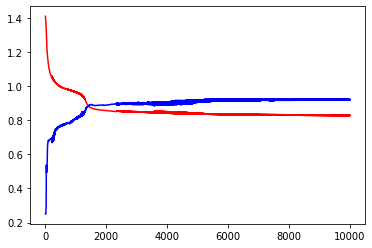

In [21]:
fn = FirstNetwork()
fit(epochs=10000, learning_rate=2)

# Using nn.Linear and Optim

## defining the class for forward pass using nn.Linear

In [0]:
class FirstNetwork_V1(nn.Module):
  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)

  def forward(self,X):
    a1 = self.lin1(X)
    h1 = a1.sigmoid()
    a2 = self.lin2(h1)
    h2 = a2.exp()/a2.exp().sum(-1).unsqueeze(-1)
    return h2

## calculating the loss and plotting

loss before training: 1.395160436630249
loss after training: 0.8692107200622559


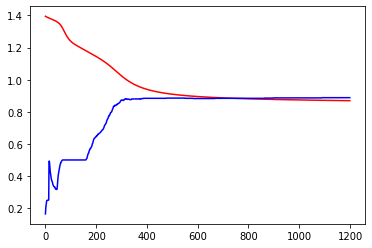

In [32]:
fn = FirstNetwork_V1()
fit(epochs=1200, learning_rate=1)

## importing the library for optim

In [0]:
from torch import optim

## defining the fit function using Stochastic Gradient Descent

In [0]:
def fit_v1(epochs=1000,learning_rate=1):
  loss_arr = []
  acc_arr = []

  opt = optim.SGD(fn.parameters(),lr=learning_rate)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat,Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()

  plt.plot(loss_arr,'r-')
  plt.plot(acc_arr,'b-')
  plt.show()

  print('loss before training:',loss_arr[0])
  print('loss after training:', loss_arr[-1])


## calculating the loss and plotting

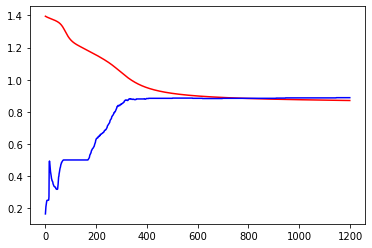

loss before training: 1.395160436630249
loss after training: 0.8704349994659424


In [48]:
fn = FirstNetwork_V1()
fit_v1(epochs=1200,learning_rate=0.95)

# Using NN.Sequential

## defining the class for forward propogation using nn.sequential

In [0]:
class FirstNetwork_V2(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid(),
        nn.Linear(2,4),
        nn.Softmax(dim=1)
    )
    
  def forward(self,X):
    return self.net(X)

## calculating the loss and plotting

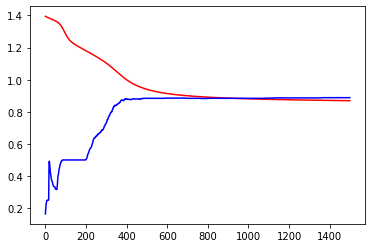

loss before training: 1.395160436630249
loss after training: 0.8692190051078796


In [69]:
fn = FirstNetwork_V2()
fit_v1(epochs=1500,learning_rate=0.80)

##defining the fit function using optim

In [0]:
def fit_V2(x,y, model, opt, loss_fn, epochs=1200):
  for epoch in range(epochs):
    loss = loss_fn(model(x),y)
    
    loss.backward()
    opt.step()
    opt.zero_grad()
  
  return loss.item()   

##calculating the loss

In [71]:
fn = FirstNetwork_V2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=0.95)
fit_V2(X_train, Y_train, fn, opt, loss_fn)

0.8704349994659424

#Running on GPU

## identifying the device type

In [0]:
device = torch.device("cuda")

## Calculating the time of execution while on GPU

In [79]:
X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_V2()
fn.to(device)
tic = time.time()
print("Final Loss:", fit_V2(X_train, Y_train, fn, opt, loss_fn, epochs=1200))
toe = time.time()
print("time taken:", toe - tic)

Final Loss: 1.3951594829559326
time taken: 1.1031529903411865


## defining more complex model sequential with 1024*4 neurons 

In [0]:
class FirstNetwork_V3(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,1024*4),
        nn.Sigmoid(),
        nn.Linear(1024*4,4),
        nn.Softmax(dim=1)
    )
  
  def forward(self,X):
    return self.net(X)

##calculating the loss and time taken 

In [82]:
device = torch.device('cuda')
X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_V3()
fn.to(device)
tic = time.time()
print("Final Loss is:", fit_V2(X_train, Y_train, fn,opt,loss_fn, epochs=2000))
toe = time.time()
print('time taken is:', toe - tic)

Final Loss is: 1.3890228271484375
time taken is: 1.7997560501098633
